In [2]:
import numpy as np
from portfolio import Portfolio
import datetime

In [3]:
companies = ["BRK-A", "UAL", "NVDA", "AAPL", "NKE", "WMT", "XOM", "PG", "C", "ORCL", "GILD",
             "HON", "JPM", "INTU", "AXP"]
start = "2007-01-05"
end = datetime.datetime.now().strftime("%Y-%m-%d")

In [4]:
amount = 10_000 
window = 30
train_split = 0.8
mode="train"
weights = np.random.random(len(companies))
portfolio = Portfolio(companies, amount, weights, window, mode, start, "2019-08-06")

In [7]:
import matplotlib.pyplot as plt

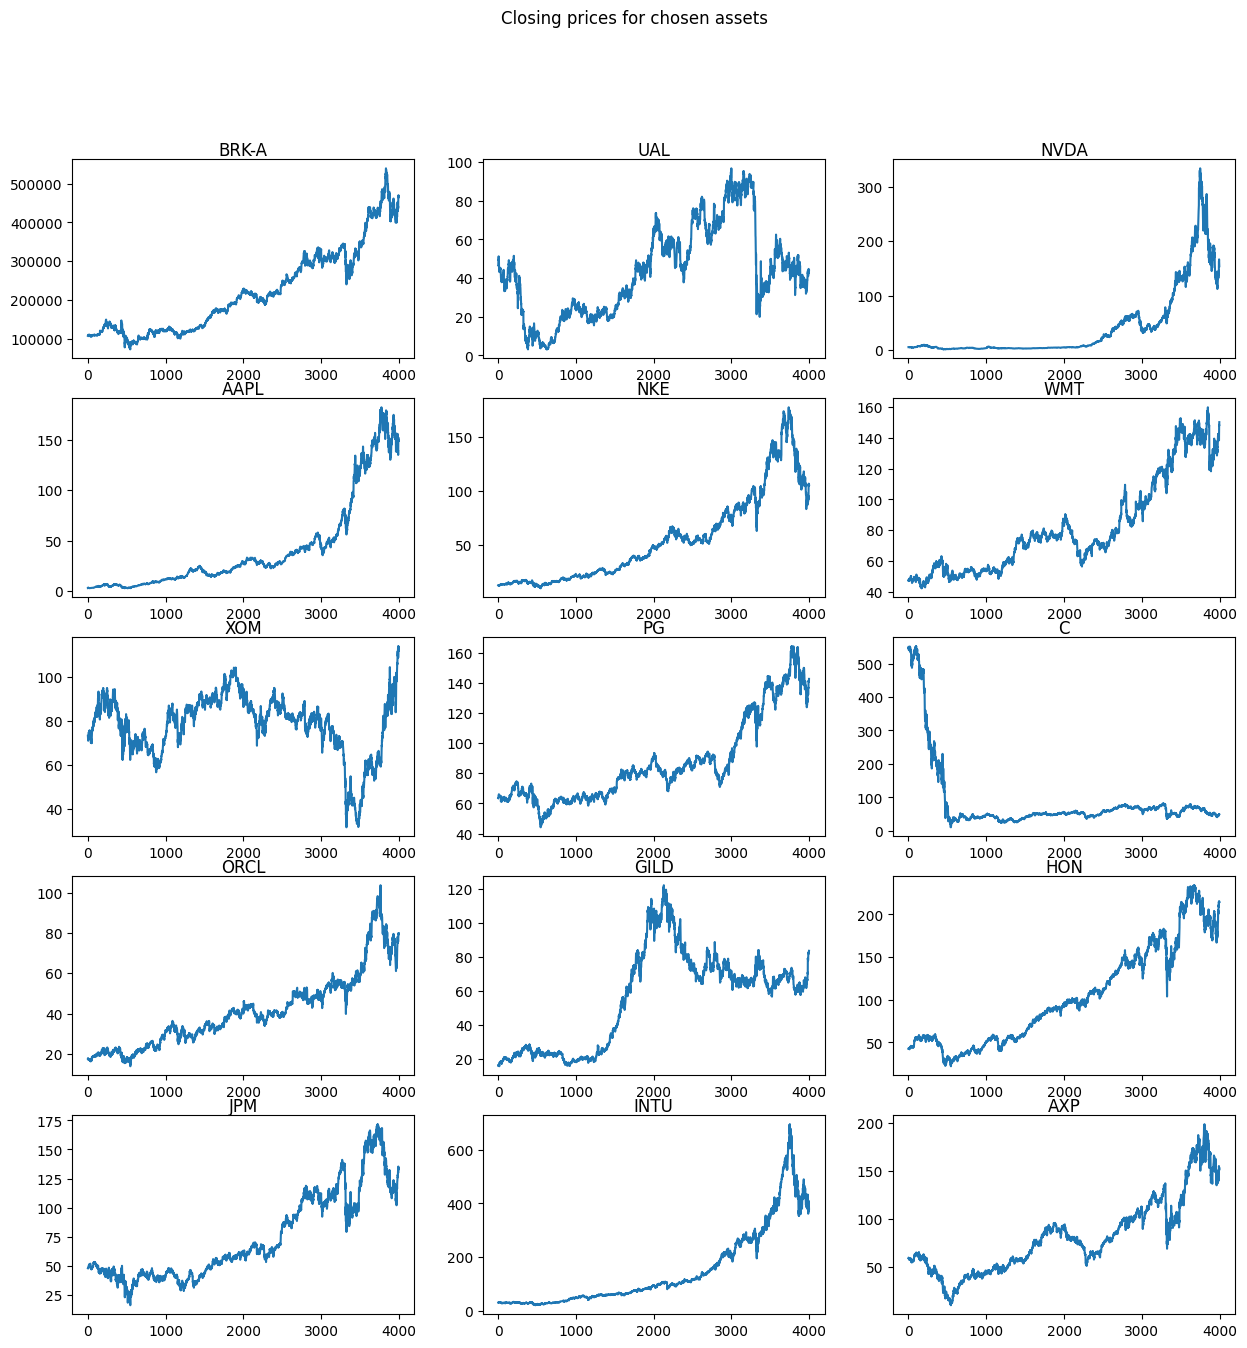

In [8]:
nrows = 5
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
fig.suptitle("Closing prices for chosen assets")
k = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i, j].set_title(companies[k], pad=3.0)
        axs[i, j].plot(portfolio.data_handler.df["Close", companies[k]].values)
        k += 1

Testing equal weighted returns

In [9]:
equal_weights = np.array([1/15 for _ in range(15)])
portfolio.update_allocation(equal_weights)

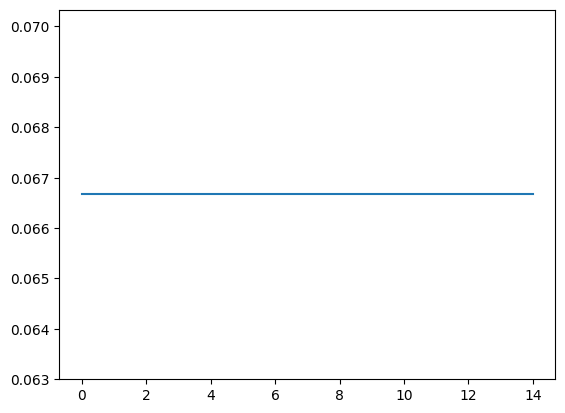

In [10]:
plt.plot(equal_weights)

In [11]:
done = False

while not done:
    portfolio.tick()
    _, done = portfolio.relative_price

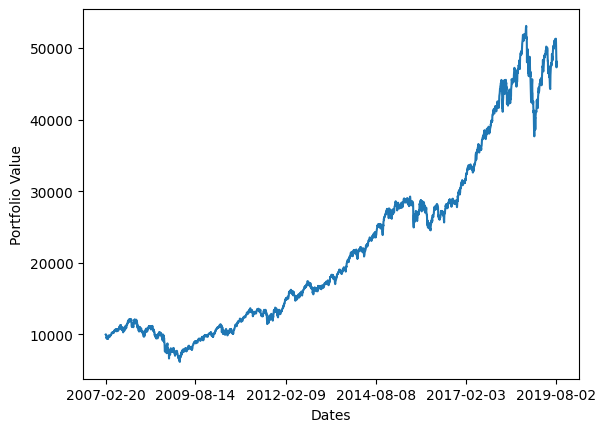

In [12]:
portfolio.plot()

In [13]:
print("Training experiment")
print("Initial portfolio value with equal weights:", amount)
print("Final portfolio value with equal weights:", portfolio.total_portfolio_value)

Training experiment
Initial portfolio value with equal weights: 10000
Final portfolio value with equal weights: 48054.68511325731


In [15]:
mode = "test"
test_portfolio = Portfolio(companies, amount, equal_weights, window, mode, start, "2019-08-06")
done = False

while not done:
    test_portfolio.tick()
    _, done = test_portfolio.relative_price

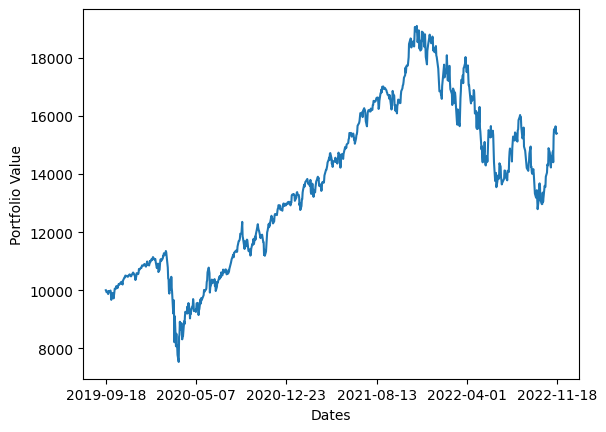

In [16]:
test_portfolio.plot()

In [17]:
print("Test experiment")
print("Initial portfolio value with equal weights:", amount)
print("Final portfolio value with equal weights:", test_portfolio.total_portfolio_value)

Test experiment
Initial portfolio value with equal weights: 10000
Final portfolio value with equal weights: 15402.193868436128
